In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.shape # 18 features

(12330, 18)

In [5]:
df.info() # no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [7]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [23]:
# univariate analysis

In [8]:
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [24]:
df['Revenue'].value_counts() # obs -> imbalanced dataset

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df['SpecialDay'].unique()

array([0. , 0.4, 0.8, 1. , 0.2, 0.6])

<Axes: ylabel='count'>

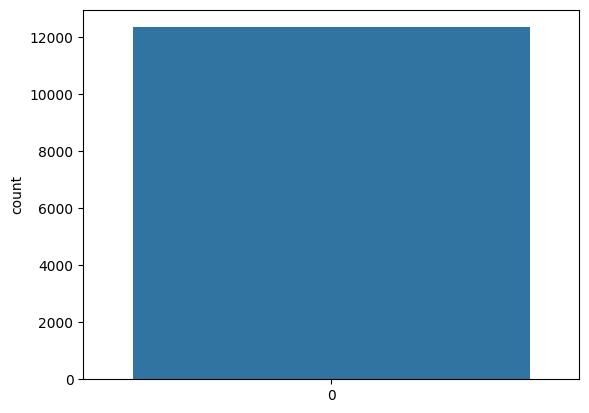

In [28]:
sns.countplot(df['Revenue'])

<Axes: ylabel='count'>

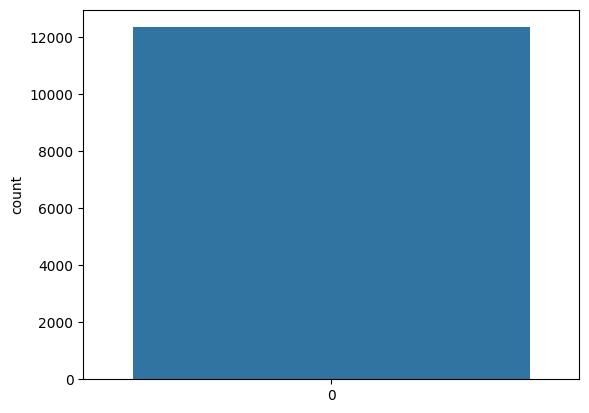

In [29]:
sns.countplot(df['Weekend'])

In [30]:
df["OperatingSystems"].value_counts()

OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: count, dtype: int64

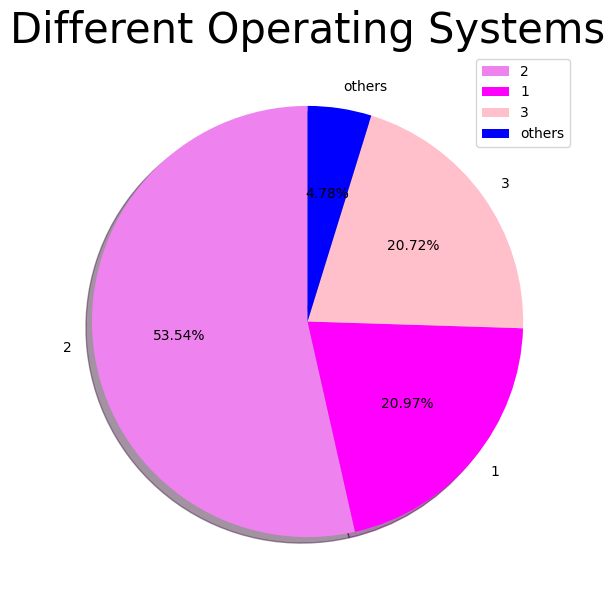

In [31]:
plt.rcParams['figure.figsize'] = (18, 7)
size = [6601, 2585, 2555, 589]
colors = ['violet', 'magenta', 'pink', 'blue']
labels = "2", "1", "3", "others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle=90)
plt.title('Different Operating Systems', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

In [32]:
df['Browser'].value_counts()

Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: count, dtype: int64

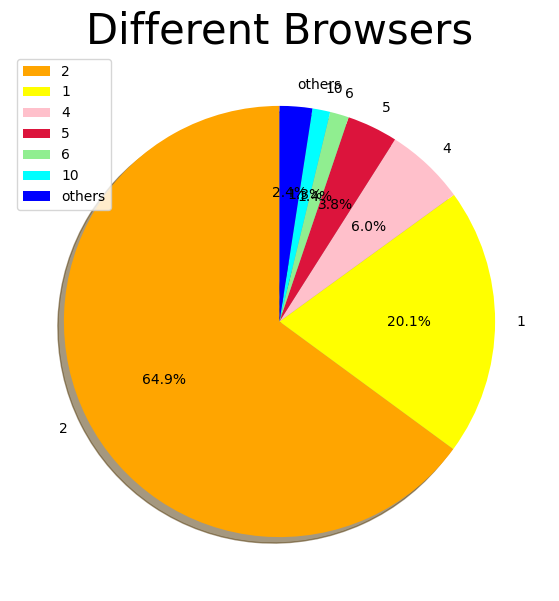

In [33]:
plt.rcParams['figure.figsize'] = (18, 7)

size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1", "4", "5", "6", "10", "others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.1f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

In [34]:
df['Month'].value_counts()

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

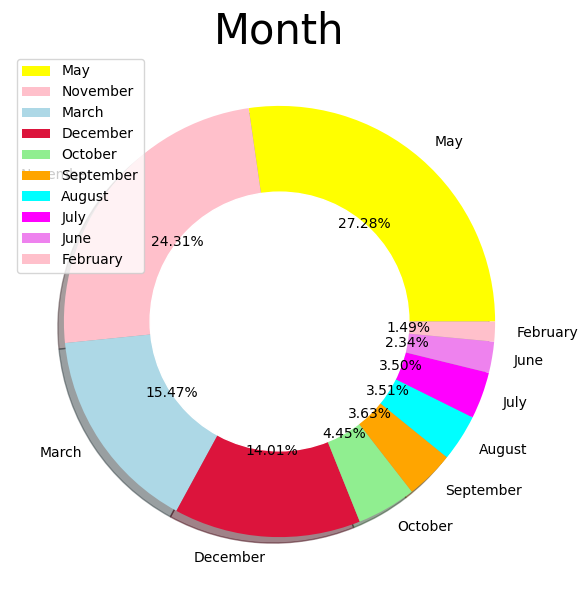

In [35]:
size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['yellow', 'pink', 'lightblue', 'crimson', 'lightgreen', 'orange', 'cyan', 'magenta', 'violet', 'pink', 'lightblue', 'red']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.rcParams['figure.figsize'] = (18, 7)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Month', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()

In [36]:
df['VisitorType'].value_counts()

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

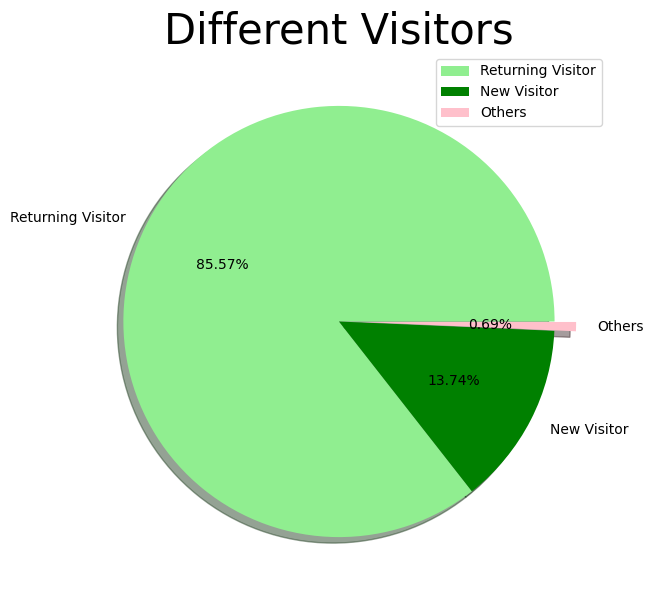

In [37]:
plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['lightGreen', 'green', 'pink']
labels = "Returning Visitor", "New Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

In [38]:
df['TrafficType'].value_counts()

TrafficType
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: count, dtype: int64

In [39]:
sns.heatmap(df.corr(), annot=True)

ValueError: could not convert string to float: 'Feb'

## feature engineering/ scaling

In [40]:
# at first we've to balance the dataset 

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [42]:
#one hot encoding

In [43]:
df1 = pd.get_dummies(df)

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [45]:
#Label encoding

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
enc = LabelEncoder()

In [48]:
df1['Revenue'] = enc.fit_transform(df1['Revenue'])
df1['Revenue'].value_counts()

Revenue
0    10422
1     1908
Name: count, dtype: int64

In [49]:
df1['Weekend'] = enc.fit_transform(df1['Weekend'])
df1['Weekend'].value_counts()

Weekend
0    9462
1    2868
Name: count, dtype: int64

In [50]:
y = df1['Revenue']
x = df1.drop('Revenue', axis=1)

In [51]:
from sklearn.model_selection import train_test_split
x_tr, x_test, y_tr, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [52]:
x_tr.shape

(9864, 28)

In [53]:
## balancing the training sets of data, so that model can be trained equally for both the classes

In [56]:
from imblearn.over_sampling import ADASYN

In [57]:
adasyn = ADASYN(random_state=42)

In [58]:
x_train, y_train = adasyn.fit_resample(x_tr, y_tr)

In [59]:
x_train.shape

(16573, 28)

In [60]:
from sklearn.svm import SVC
classifier = SVC()

In [61]:
classifier.fit(x_train, y_train)

SVC()

In [62]:
y_pred = classifier.predict(x_test)

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.68      0.79      2055
           1       0.32      0.76      0.45       411

    accuracy                           0.70      2466
   macro avg       0.63      0.72      0.62      2466
weighted avg       0.83      0.70      0.73      2466



In [64]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [65]:
y_pred = model.predict(x_test)

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      2055
           1       0.36      0.65      0.47       411

    accuracy                           0.75      2466
   macro avg       0.64      0.71      0.65      2466
weighted avg       0.82      0.75      0.78      2466



In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
reg = LogisticRegression()

In [69]:
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

/config/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2055
           1       0.59      0.73      0.65       411

    accuracy                           0.87      2466
   macro avg       0.76      0.81      0.78      2466
weighted avg       0.88      0.87      0.87      2466



In [71]:
## obs - we're getting highest accuracy of 87% by using logistic regression, so we'll choose this.

## unsupervised learning

In [72]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [73]:
selected_features = ['PageValues', 'ExitRates', 'ProductRelated_Duration', 'Administrative']
# these features are selected based on the correlation w.r.t. output variable

In [74]:
X = df[selected_features]

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [76]:
x_scaled = scaler.fit_transform(X)

In [77]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

/config/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/config/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/config/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/config/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

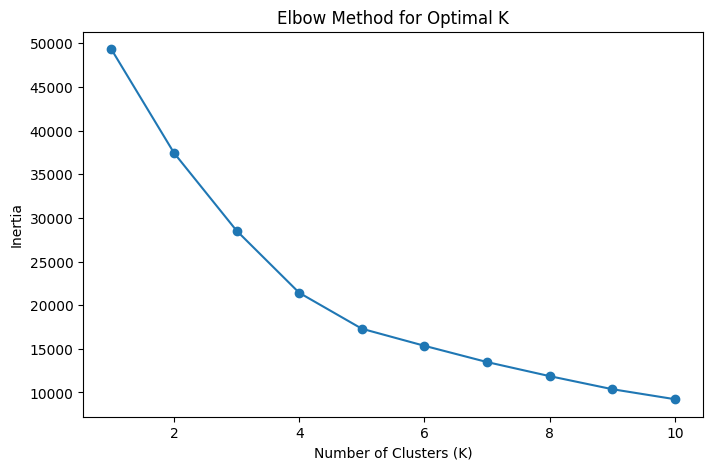

In [78]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()
# k = 4

In [79]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_scaled)

/config/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [80]:
df['Cluster'] = kmeans.labels_
score = silhouette_score(x_scaled, kmeans.labels_)
print("Silhoutte score:", score)

Silhoutte score: 0.46931061748149


In [81]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_summary = pd.DataFrame(cluster_centers, columns=selected_features)
print("Cluster Centers:")
print(cluster_summary)

Cluster Centers:
     PageValues  ExitRates  ProductRelated_Duration  Administrative
0  2.054120e+00   0.030327               876.082493        1.325294
1  6.949545e+01   0.014661              1217.477357        2.512039
2 -1.776357e-15   0.157441                92.224762        0.072005
3  6.279358e+00   0.019170              3353.873021        8.090863


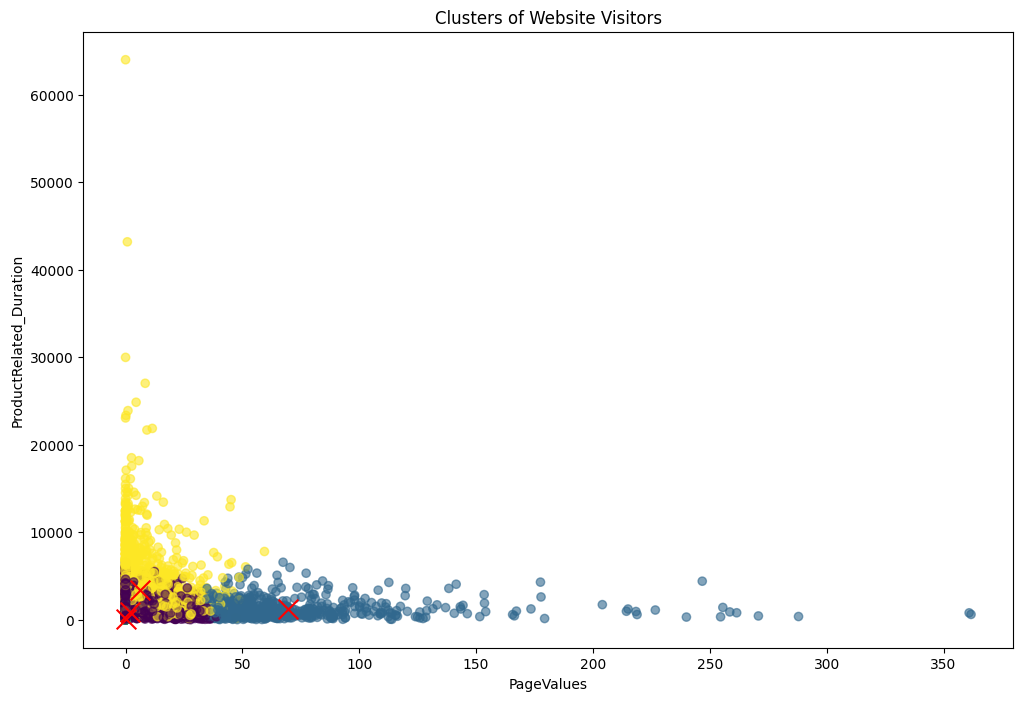

In [82]:
plt.figure(figsize=(12, 8))
plt.scatter(X['PageValues'], X['ProductRelated_Duration'], c=kmeans.labels_, cmap='viridis', alpha=0.6)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 2], c='red', marker='x', s=200)
plt.xlabel('PageValues')
plt.ylabel('ProductRelated_Duration')
plt.title('Clusters of Website Visitors')
plt.show()

In [83]:
## DBSCAN algo

In [84]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [85]:
eps = 0.5  # The maximum distance between two samples to be considered as part of the same neighborhood
min_samples = 5  # The minimum number of samples required in a neighborhood to form a core point
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(x_scaled)
score = silhouette_score(x_scaled, dbscan_labels)
print("Silhoutte score: ", score)

Silhoutte score:  0.5561676533745293


In [86]:
df['Cluster'] = dbscan.labels_

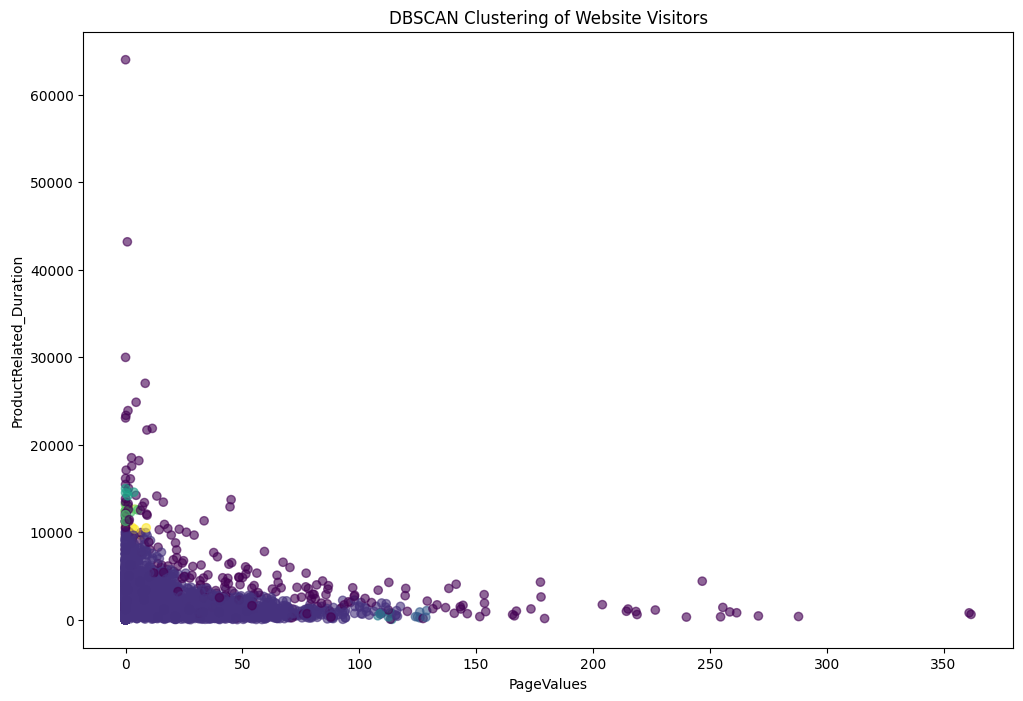

In [87]:
plt.figure(figsize=(12, 8))
plt.scatter(X['PageValues'], X['ProductRelated_Duration'], c=dbscan_labels, cmap='viridis', alpha=0.6)
plt.xlabel('PageValues')
plt.ylabel('ProductRelated_Duration')
plt.title('DBSCAN Clustering of Website Visitors')
plt.show()

## ensemble learning -> random forest

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
classifier = RandomForestClassifier(random_state=42)

In [90]:
classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [91]:
y_pred = classifier.predict(x_test)

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2055
           1       0.67      0.71      0.69       411

    accuracy                           0.89      2466
   macro avg       0.80      0.82      0.81      2466
weighted avg       0.90      0.89      0.89      2466



In [93]:
## since random forest is giving the highest accuracy we will perform hyperparameter tuning on it further
## improve the accuracy of the model

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],   # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'] # Number of features to consider when looking for the best split
}

In [98]:
rf_classifier = RandomForestClassifier(random_state=42)

In [99]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(x_train, y_train)

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
print(best_params)
print(best_model)

{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
RandomForestClassifier(n_estimators=150, random_state=42)


In [ ]:
y_pred = best_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2055
           1       0.69      0.66      0.67       411

    accuracy                           0.89      2466
   macro avg       0.81      0.80      0.80      2466
weighted avg       0.89      0.89      0.89      2466



In [ ]:
x_test.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [96]:
## lets find out the important features out of all the features

In [97]:
importances = best_model.feature_importances_
feature_names = x_train.columns

NameError: name 'best_model' is not defined

In [ ]:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
print(importance_df)

                          Feature  Importance
8                      PageValues    0.412016
5         ProductRelated_Duration    0.071044
7                       ExitRates    0.070398
1         Administrative_Duration    0.056219
4                  ProductRelated    0.048437
6                     BounceRates    0.042209
21                      Month_May    0.037891
0                  Administrative    0.028881
27  VisitorType_Returning_Visitor    0.025661
20                      Month_Mar    0.020693
16                      Month_Dec    0.020273
13                    TrafficType    0.019755
12                         Region    0.019706
10               OperatingSystems    0.018365
3          Informational_Duration    0.018316
25        VisitorType_New_Visitor    0.013896
11                        Browser    0.013385
2                   Informational    0.010880
22                      Month_Nov    0.010768
14                        Weekend    0.009740
23                      Month_Oct 

## now lets create a model with just the best parameters

In [ ]:
cols = [
    "PageValues",
    "ExitRates",
    "ProductRelated",
    "ProductRelated_Duration",
    "BounceRates",
    "VisitorType_New_Visitor",
    "VisitorType_Returning_Visitor",
    "VisitorType_Other",
    "Month_Aug",
    "Month_Dec",
    "Month_Feb",
    "Month_Jul",
    "Month_June",
    "Month_Mar",
    "Month_May",
    "Month_Nov",
    "Month_Oct",
    "Month_Sep",
]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_clf = RandomForestClassifier(random_state=42)
scores = cross_val_score(rf_clf, x_train[cols], y_train, cv=5, scoring="f1_macro")
print("Scores:", scores)
print("Average score:", np.mean(scores))

Scores: [0.775426   0.9459935  0.95324146 0.94806718 0.94869343]
Average score: 0.91428431349862


In [ ]:
# only select the most important features
X_train_tr = x_train[cols].copy()
X_test_tr = x_test[cols].copy()
# convert seconds to minutes
X_train_tr["ProductRelated_Duration"] = X_train_tr["ProductRelated_Duration"] / 60

NameError: name 'x_train' is not defined

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

param_dist = {
    "n_estimators": randint(low=100, high=1000),
    "max_depth": randint(low=3, high=15),
    "min_samples_split": randint(low=2, high=20),
    "min_samples_leaf": randint(low=1, high=10),
    "max_features": ["auto", "sqrt", "log2"],
}

rf_clf = RandomForestClassifier(random_state=42, oob_score=True)

rf_rnd_search = RandomizedSearchCV(
    rf_clf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="f1_macro",
    random_state=42,
)

rf_rnd_search.fit(X_train_tr, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(oob_score=True,
                                                    random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002960FBC4670>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000029600207610>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000029600207130>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002960F744D60>},
                   random_state=42, scoring='f1_macro')

In [ ]:
rf_rnd_search.best_score_

0.9044944926342261

In [ ]:
classifier = rf_rnd_search.best_estimator_

In [ ]:
rf_rnd_search.best_params_

{'max_depth': 14,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 15,
 'n_estimators': 962}

In [ ]:
# make final predictions
y_pred = rf_rnd_search.best_estimator_.predict(X_test_tr)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2084
           1       0.65      0.70      0.68       382

    accuracy                           0.90      2466
   macro avg       0.80      0.82      0.81      2466
weighted avg       0.90      0.90      0.90      2466



In [ ]:
def predict_purchase_intension(
    PageValues,
    ExitRates,
    ProductRelated,
    ProductRelated_Duration,
    BounceRates,
    VisitorType,
    Month,
):

    visitor_type_index = np.where(X_train_tr.columns == VisitorType)[0][0]
    month_index = np.where(X_train_tr.columns == Month)[0][0]

    x = np.zeros(len(X_train_tr.columns))
    x[0] = PageValues
    x[1] = ExitRates
    x[2] = ProductRelated
    x[3] = ProductRelated_Duration
    x[4] = BounceRates
    x[visitor_type_index] = 1
    x[month_index] = 1

    return print("class:", rf_rnd_search.best_estimator_.predict([x])[0])

In [ ]:
predict_purchase_intension(
    5, 0.20, 10, 5, 0.30, "VisitorType_New_Visitor", "Month_Nov"
)

class: 1


C:\Users\Yash Tripathi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
## exporting the model as a pickle file

In [ ]:
import pickle

In [ ]:
pickle.dump(classifier, open('randomForest.pkl', 'wb'))